# IAU 2023/2024
## **Autori:** Laura Fulajtárová (50%), Bruno Kristián (50%)

# Fáza 1 - Prieskumná analýza 

## Základný opis dát spolu s ich charakteristikami 

### Analýza štruktúr dát:

### - súbory: štruktúry a vzťahy, počet, typy, …


Náš dataset je zložený z 3 .csv súborov s názvami:
- product.csv
- user.csv
- session.csv

Jednotlivé záznamy sú v našich datasetoch uložené nasledovne:
- každý riadok reprezentuje jeden záznam
- záznamy v riadkoch sú oodelené tabulátorom (\t)

Z názvov datasetov a neskoršej analýzy údajov v datasete sme zistili, že dáta pochádzajú z e-shopu a vieme nájsť vzťahy medzi jednotlivými datasetmi.

In [41]:
#import libraries
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from scipy.stats import iqr
import statsmodels.stats as sm_stats
from sklearn import preprocessing
import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy.stats import ttest_ind

In [42]:
#load files
session = pd.read_csv("session.csv", sep='\t')
product = pd.read_csv("product.csv", sep='\t')
user = pd.read_csv("user.csv", sep='\t')

### - záznamy: štruktúry, počet záznamov, počet atribútov, typy, …

#### 1. Product.csv analýza

Analyzujeme štruktúru záznamu

In [43]:
product.shape[1]

4

Zistili sme, že v súbore sa nachádzajú dáta v 4 stĺpoch.

In [44]:
product.columns

Index(['product_ean', 'location', 'store_name', 'code'], dtype='object')

Stĺpce v datasete sú:
- product_ean
- location
- store_name
- code

In [45]:
product.dtypes

product_ean     int64
location       object
store_name     object
code           object
dtype: object

In [46]:
product.head()

,product_ean,location,store_name,code
0,2278514168815,Europe/Samara,Otradnyy,RU
1,307186409789,Europe/Paris,Colomiers,FR
2,9188379583568,Asia/Karachi,Larkana,PK
3,3552278027397,Australia/Sydney,Baulkham Hills,AU
4,3095423396295,America/New_York,Thomasville,US


Dáta v týchto stĺpcoch sú:
- product_ean : integer (číslo)
- location : object (reťazec)
- store_name : object (reťazec)
- code : object (reťazec)

Tiež si zistíme počet záznamov

In [47]:
product.shape[0]

14921

Zistili sme, že máme 14 921 záznamov.

#### 1. User.csv analýza

Postupujeme podobne ako pri analyzovaní product.csv

In [48]:
user.shape

(2579, 11)

In [49]:
user.columns

Index(['job', 'birthdate', 'name', 'sex', 'address', 'residence', 'username',
       'registration', 'user_id', 'mail', 'race'],
      dtype='object')

In [50]:
user.dtypes

job             object
birthdate       object
name            object
sex             object
address         object
residence       object
username        object
registration    object
user_id          int64
mail            object
race            object
dtype: object

In [51]:
user.head()

,job,birthdate,name,sex,address,residence,username,registration,user_id,mail,race
0,"Nurse, children's",1965-08-08,Ludmila Šimková,F,Bořetínská 20\n481 76 Polná,Konžská 16\n405 90 Borohrádek,vladimirablahova,"09/18/2020, 00:00:00",782,hajekadam@chello.cz,NaN
1,NaN,NaN,Fabrizia Beccaria,NaN,"Stretto Zarlino, 87\n10039, Pecco (TO)",NaN,paloma33,14 May 2021,2158,silvioiacobucci@libero.it,NaN
2,NaN,NaN,João Alves,NaN,"Passarela de Jesus, 33\nPirineus\n19889610 Cav...",NaN,eduardoda-rosa,2017/06/23,747,beniciocampos@yahoo.com.br,NaN
3,"Exhibitions officer, museum/gallery",2003-02-24,Zdeňka Krejčová,F,Novákovo Náměstí 2\n582 33 Protivín,NaN,jandovanela,2019/05/16,2204,jelinkovapetra@email.cz,NaN
4,NaN,NaN,Juan Cunha,NaN,"Área Melo, 55\nDom Cabral\n03392-450 Ferreira ...",NaN,lara09,2019/10/28,720,stella46@bol.com.br,NaN


Zistili sme:
- počet stĺpcov: 11
- počet záznamov: 2 579

- dáta v stĺpoch:
    - job: object string (reťazec)
    - birthdate: string (dátum)
    - name: string (reťazec)
    - sex: string (reťazec)
    - address: string (reťazec)
    - residence: string (reťazec)
    - username: string (reťazec)
    - registration: string (dátum)
    - user_id: integer (číslo)
    - mail: string (reťazec)
    - race: string (reťazec)

#### 1. Session.csv analýza

Takisto analyzujeme aj session.csv

In [52]:
session.shape

(11052, 25)

In [53]:
session.columns

Index(['pct_mouse_click', 'pct_scroll_move', 'pct_doubleclick', 'pct_input',
       'screen_width', 'session_start', 'page_activity_duration', 'ack',
       'pct_click', 'pct_mouse_move', 'browser_name', 'pct_scrandom',
       'pct_scroll_move_duration', 'mouse_move_total_rel_distance',
       'product_ean', 'screen_height', 'pct_rage_click', 'pct_wild_mouse',
       'session_duration', 'wild_mouse_duration', 'session_id',
       'pct_click_product_info', 'scroll_move_total_rel_distance',
       'total_load_time', 'user_id'],
      dtype='object')

In [54]:
session.dtypes

pct_mouse_click                   float64
pct_scroll_move                   float64
pct_doubleclick                   float64
pct_input                         float64
screen_width                       object
session_start                      object
page_activity_duration            float64
ack                               float64
pct_click                         float64
pct_mouse_move                    float64
browser_name                       object
pct_scrandom                      float64
pct_scroll_move_duration          float64
mouse_move_total_rel_distance     float64
product_ean                         int64
screen_height                      object
pct_rage_click                    float64
pct_wild_mouse                    float64
session_duration                  float64
wild_mouse_duration               float64
session_id                          int64
pct_click_product_info            float64
scroll_move_total_rel_distance    float64
total_load_time                   

In [55]:
session.head()

,pct_mouse_click,pct_scroll_move,pct_doubleclick,pct_input,screen_width,session_start,page_activity_duration,ack,pct_click,pct_mouse_move,...,screen_height,pct_rage_click,pct_wild_mouse,session_duration,wild_mouse_duration,session_id,pct_click_product_info,scroll_move_total_rel_distance,total_load_time,user_id
0,13.96921,52.93808,15.41059,0.32897,1024,2021-08-04 05:25:09,15.59475,1.0,14.57201,16.41346,...,lower,49.58705,75.18599,183.82111,13.70777,936507,32.63370,13.86841,1.92048,875
1,12.21072,54.85927,14.93146,1.34612,lower,2018-10-26 23:05:20,15.77980,1.0,16.82394,12.25984,...,lower,44.08378,53.82694,107.89143,15.11730,592275,76.77153,14.14286,1.02868,2200
2,15.44027,46.58433,16.58475,7.57896,800,2021-07-02 04:39:00,13.80181,1.0,12.25488,11.21587,...,768,65.23820,52.02630,113.48302,16.84554,826998,63.66292,12.65286,2.16349,178
3,17.01141,42.11313,14.53051,0.03413,800,2021-02-02 05:49:16,12.75978,0.0,10.92709,14.36661,...,1080,52.11998,56.13281,194.80296,11.43350,227707,60.13113,12.09981,5.91794,404
4,18.19680,36.33081,11.25558,0.00502,1920,2020-05-16 06:22:17,16.78214,1.0,11.22324,12.68782,...,768,33.55068,19.08152,191.28224,9.49524,1342490,53.72560,12.19035,2.87977,271


Zistili sme:
- počet stĺpcov: 25
- počet záznamov: 11 052

- dáta v stĺpoch:
    - pct_mouse_click: float
    - pct_scroll_move: float
    - pct_doubleclick: float
    - pct_input: float
    - screen_width: object
    - session_start: object
    - page_activity_duration: float
    - ack: float
    - pct_click: float
    - pct_mouse_move: float
    - browser_name: string
    - pct_scrandom: float
    - pct_scroll_move_duration: float
    - mouse_move_total_rel_distance: float
    - product_ean: integer
    - screen_height: object
    - pct_rage_click: float
    - pct_wild_mouse: float
    - session_duration: float
    - wild_mouse_duration: float
    - session_id: integer
    - pct_click_product_info: float
    - scroll_move_total_rel_distance: float
    - total_load_time: float
    - user_id: integer

### Analýza jednotlivých atribútov:

##### Analýza distribúcie pre product.csv

In [56]:
product['product_ean'].min()

592769026

In [57]:
product['product_ean'].max()

9999258670732

In [58]:
stats.mode(product['code'])

ModeResult(mode=array(['US'], dtype=object), count=array([2492]))

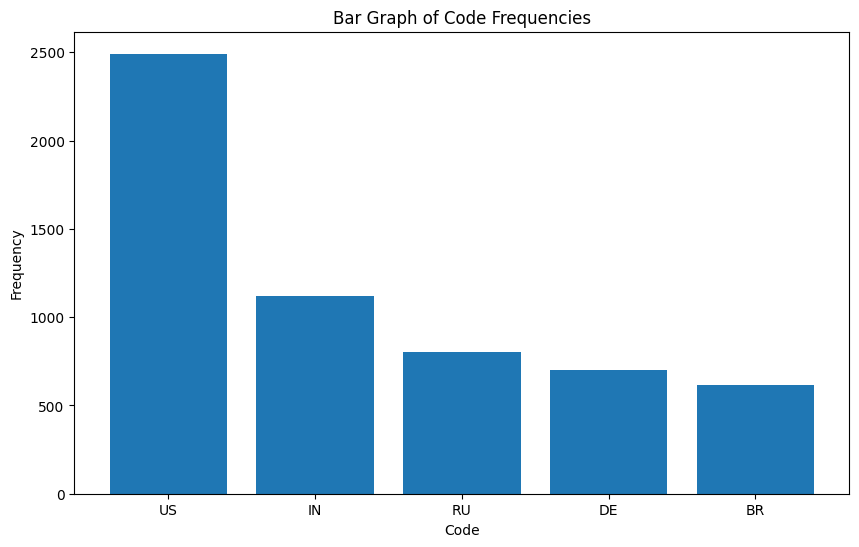

In [59]:
code_counts = product['code'].value_counts()
code_counts = code_counts.sort_values(ascending=False)
top_5_code_counts = code_counts.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_code_counts.index, top_5_code_counts.values)

plt.xlabel('Code')
plt.ylabel('Frequency')
plt.title('Bar Graph of Code Frequencies')

plt.show()

Z analýzy distribúcie dát z atribútov 'product_ean' a 'code' zo súboru product.csv sme zistili nasledovné:
- product_ean je nahodné číslo nachádzajúce sa v intervale od 592769026 do 9999258670732 
- najviac obchodov sa nachádza v Spojených štátoch
- 5 najväčších trhov je: Spojené štáty, India, Rusko, Nemecko a Brazília

##### Analýza distribúcie pre user.csv

In [60]:
user['birthdate'] = pd.to_datetime(user['birthdate'], errors='coerce')
user['birthdate'].mean()

Timestamp('1964-07-05 21:56:06.431593792')

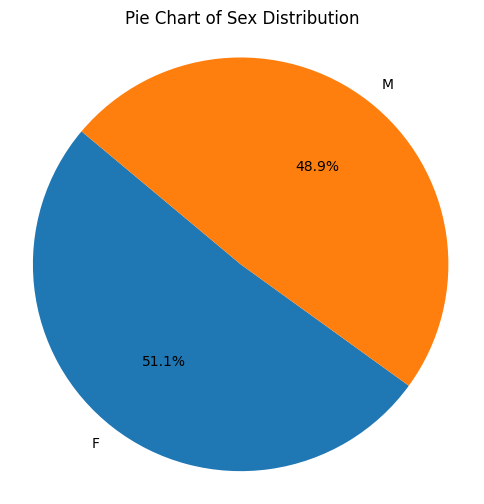

In [61]:
sex_counts = user['sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Pie Chart of Sex Distribution')

plt.axis('equal')
plt.show()

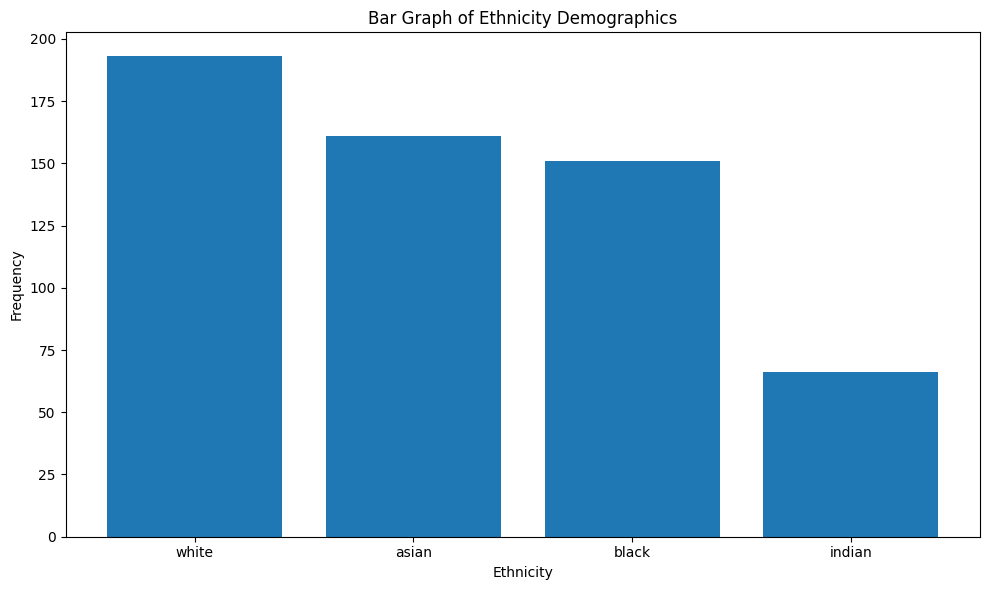

In [62]:
user['race'] = user['race'].replace('unspecified', np.nan)
code_counts = user['race'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(code_counts.index, code_counts.values)

plt.xlabel('Ethnicity')
plt.ylabel('Frequency')
plt.title('Bar Graph of Ethnicity Demographics')

plt.tight_layout()
plt.show()

In [63]:
# Extract the email corporations from the 'mail' column
user['email_corporation'] = user['mail'].str.split('@').str[1]

# Find the most used email corporation
most_used_corporation = user['email_corporation'].value_counts().idxmax()

print("The most used email corporation is:", most_used_corporation)

The most used email corporation is: gmail.com


In [64]:
num_unique_jobs = user['job'].nunique()

# If there's only one unique job, there's no most frequent job
if num_unique_jobs == 1:
    print("There is no most frequent job")
else:
    # Find the counts of each unique job and sort in descending order
    most_frequent = user['job'].value_counts()

    # Check if most_frequent is a scalar (only one unique job)
    if isinstance(most_frequent, pd.Series):
        most_frequent_job_name = most_frequent.index[0]
        print("The most frequent job is", most_frequent_job_name)
    else:
        print("There is no most frequent job")


The most frequent job is Chirurgiemechaniker


In [65]:
user['registration'] = pd.to_datetime(user['registration'], errors='coerce')
average_duration=user['registration'].mean()

today = pd.Timestamp('2023-10-01')

# Print the result in years
print("The average duration of customers with us until 2023 is approximately {} years.".format(today.year - average_duration.year))


The average duration of customers with us until 2023 is approximately 5 years.


Z analýzy niektorých atribútov v súbore user.scv sme sa dozvedeli tieto informaćie o demografií našich užívateľov:
- priemerný vek užívateľa je 59 rokov
- pohlavie užívateľov je rovnomerne rozdelené 
- najviac zastúpená rasa je biela
- najčastejším zamestnaním je Chirurgiemechaniker
- najčastejším poskytovateľom emailových služieb je gmail.com
- najviac zákazníkov sme získali pred 5 rokmi

##### Analýza distribúcie pre session.csv

In [66]:
session['session_duration'].mean()

150.06632922276512

In [67]:
stats.mode(session['product_ean'])

ModeResult(mode=array([50264523579], dtype=int64), count=array([2]))

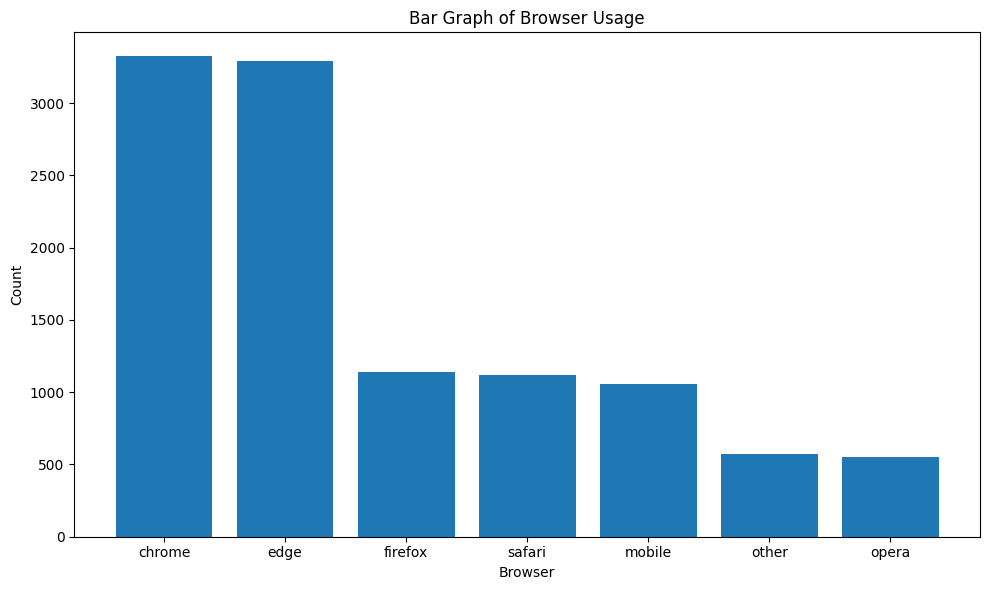

In [68]:
browser_counts = session['browser_name'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(browser_counts.index, browser_counts.values)

plt.xlabel('Browser')
plt.ylabel('Count')
plt.title('Bar Graph of Browser Usage')

plt.tight_layout()
plt.show()

In [69]:
session['session_start'] = pd.to_datetime(session['session_start'], errors='coerce')

session['time_in_seconds'] = session['session_start'].dt.hour * 3600 + session['session_start'].dt.minute * 60 + session['session_start'].dt.second

average_time_in_seconds = np.mean(session['time_in_seconds'])

average_hours = int(average_time_in_seconds / 3600)
average_minutes = int((average_time_in_seconds % 3600) / 60)
average_seconds = int(average_time_in_seconds % 60)
average_time = f"{average_hours:02d}:{average_minutes:02d}:{average_seconds:02d}"

print("The average time is", average_time)


The average time is 12:03:40


Z analýzy niektorých atribútov v súbore session.scv sme sa dozvedeli tieto informaćie o správaní sa používateľov :
- priemerne užívateľ strávi pri jedenj relácii 150 sekúnd
- užívatelia sa najviac zaujímali o produkt s eanom: 50264523579
- najpoužívanejšie internetové prehliadače sú: chrome a edge
- najčastejšie nakupovanie prebieha o 12:03:40

### Identifikácie vzťahov medzi atribútmi

##### Analýza vzťahov medzi atribútami pre product.csv

In [70]:
product_categorical=product[['store_name','location', 'code']]

In [71]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [72]:
rows= []

for var1 in product_categorical:
  col = []
  for var2 in product_categorical :
    cramers =cramers_V(product_categorical[var1], product_categorical[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = product_categorical.columns, index =product_categorical.columns)

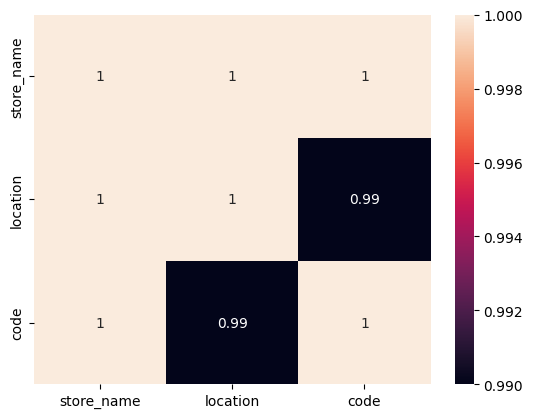

In [73]:
data = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
  
annot = True
  
hm = sns.heatmap(data=df,
                annot=annot)
  
plt.show()

Zistili sme asociácie medzi kategorickými atribútmi. 

Z heatmap vidíme, že atribúty 'store_name', 'loction' a 'code' spolu veľmi úzko súvisia.

##### Analýza vzťahov medzi atribútami pre user.csv

In [74]:
user_categorical=user[['job','name', 'sex', 'address', 'residence', 'username', 'mail', 'race']]

In [75]:
rows= []

for var1 in user_categorical:
  col = []
  for var2 in user_categorical :
    cramers =cramers_V(user_categorical[var1], user_categorical[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = user_categorical.columns, index =user_categorical.columns)

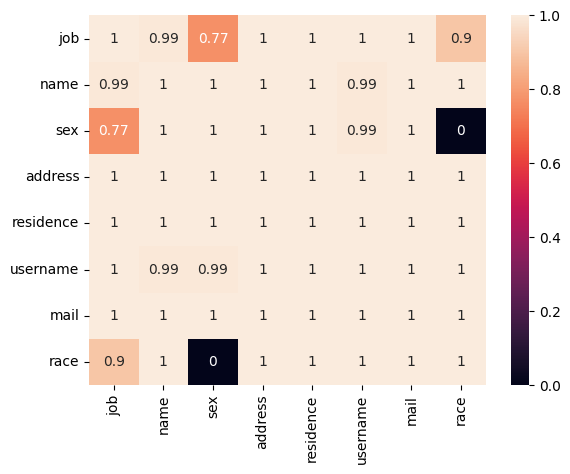

In [76]:
data = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
  
annot = True
  
hm = sns.heatmap(data=df,
                annot=annot)
  
plt.show()

Z heatmapy nám vyplýva nasledovné:
- rasa a pohlavie spolu nesúvisia
- pohlavie a zamestnanie spolu viacmenej súvisia
- ostatné atribúty spolu úzko súvisia

Skúsme analyzovať ďalšie možné vzťahy.

c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


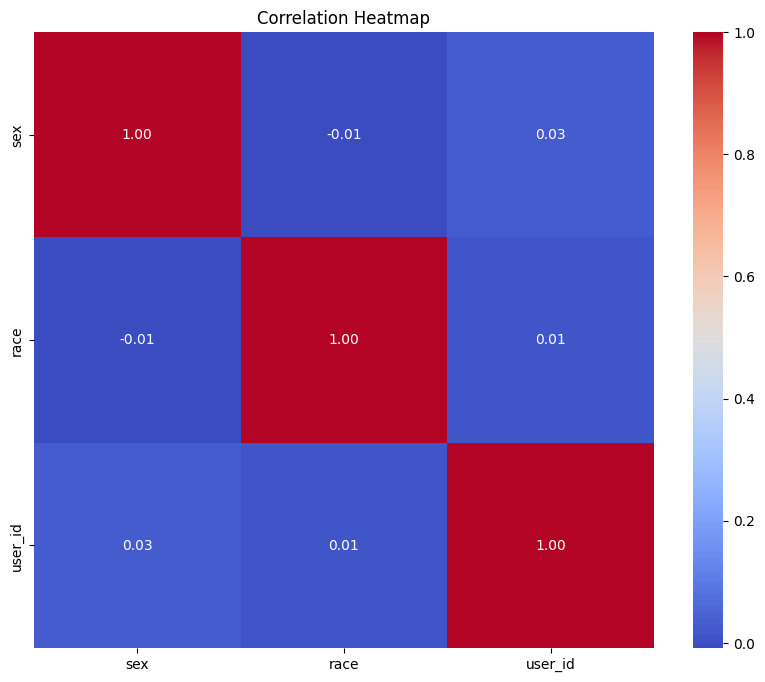

In [77]:
user_others=user[['sex','race', 'user_id']]

# Replace 'F' with 0 and 'M' with 1 in the 'sex' column
user_others['sex'] = user_others['sex'].replace({'F': 0, 'M': 1})

# Map 'race' values to numerical values (you can customize the mapping)
race_mapping = {'white': 0, 'black': 1, 'asian': 2, 'indian': 3}
user_others['race'] = user_others['race'].map(race_mapping)

# Calculate correlation matrix
correlation_matrix = user_others.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Z heatmapy vidíme, že vzťahy medzi 'user_id', pohlavým a rasou používateľa neexistujú.

##### Analýza vzťahov medzi atribútami pre session.csv

In [78]:
numeric_columns = session.select_dtypes(include=['float64', 'int64'])
correlation = numeric_columns.corr()

<AxesSubplot:>

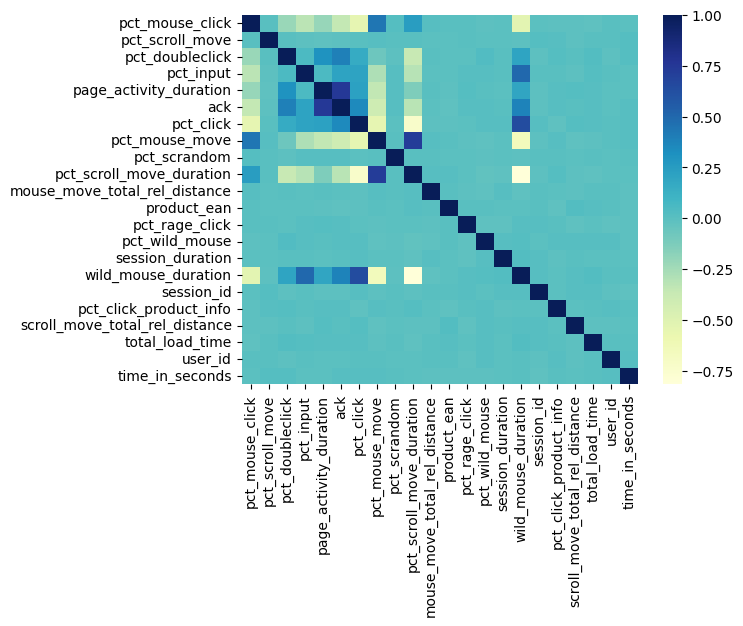

In [79]:

sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=False, cmap="YlGnBu")

In [80]:
# sns.pairplot(session, hue="ack")

Z párovej analýzy nám vyplýva, že tieto dvojice spolu najviac súvisia:
1. ack + page_activity_duration
2. pct_scroll_move_duration + pct_mouse_move
3. wild_mouse_duration + pct_click
4. pct_mouse_move + pct_mouse_click
5. wild_mouse_duration + pct_input
6. wild_mouse_duration + pct_scroll_move_duration
7. pct_scroll_move_duration + pct_click


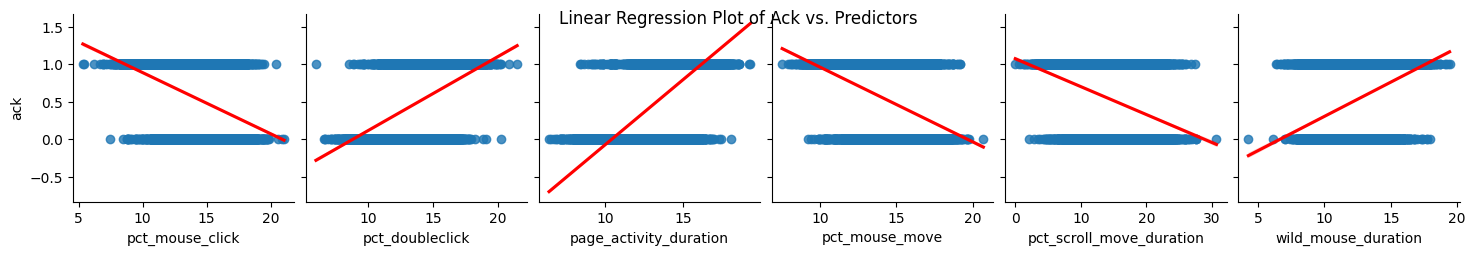

In [81]:
sns.pairplot(data=session, y_vars=["ack"], x_vars=["pct_mouse_click", "pct_doubleclick", "page_activity_duration", "pct_mouse_move", "pct_scroll_move_duration", "wild_mouse_duration"], kind="reg", plot_kws={'line_kws': {'color': 'red'}})

# Add a title
plt.suptitle("Linear Regression Plot of Ack vs. Predictors")

plt.show()


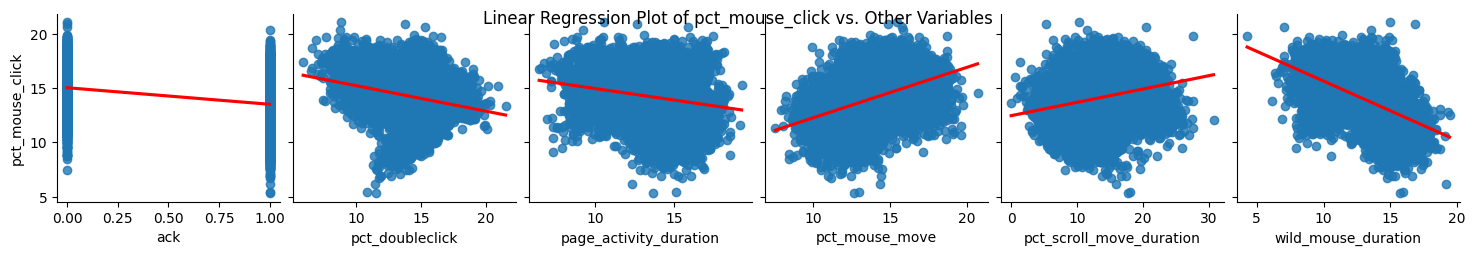

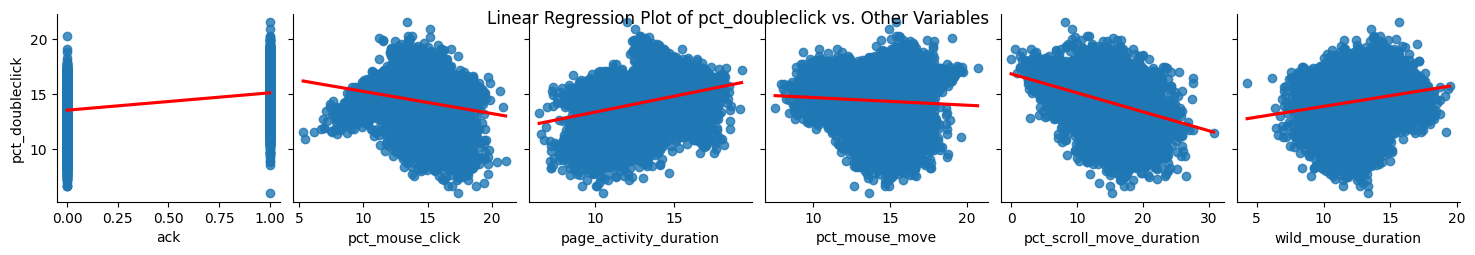

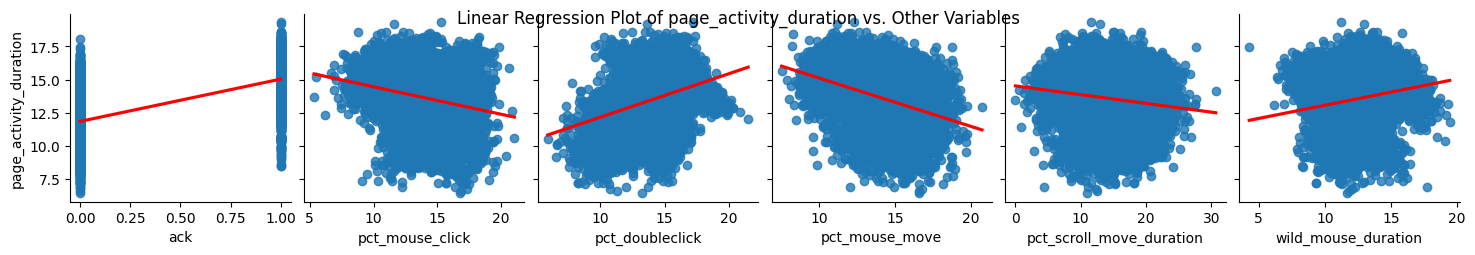

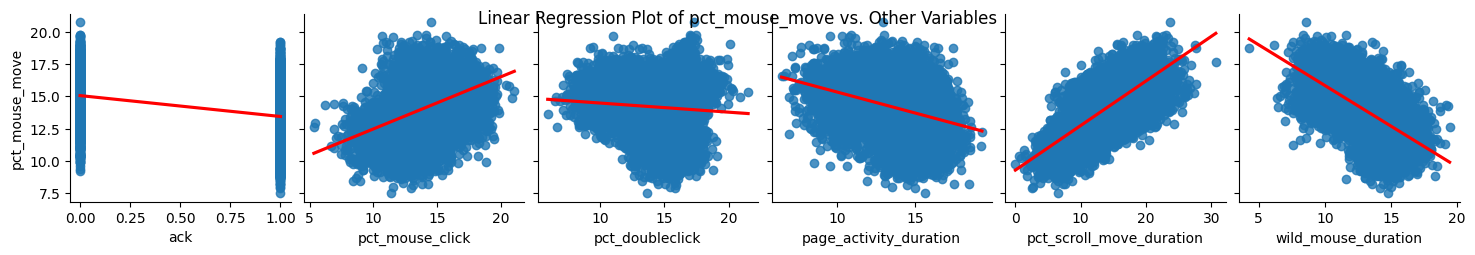

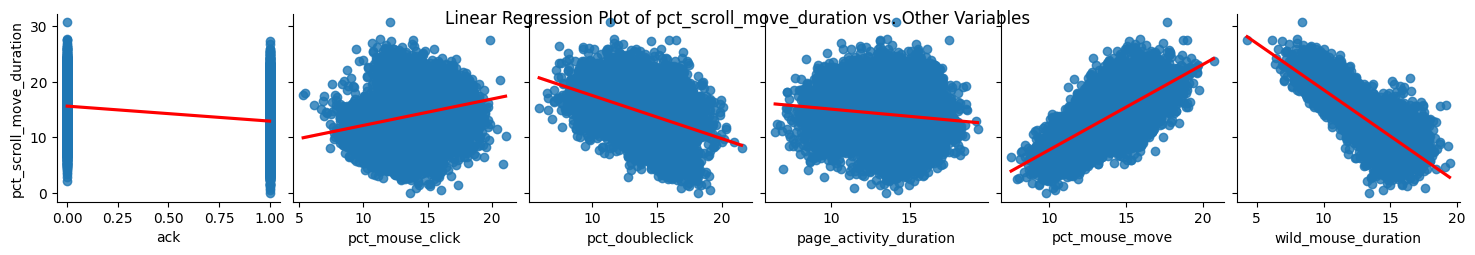

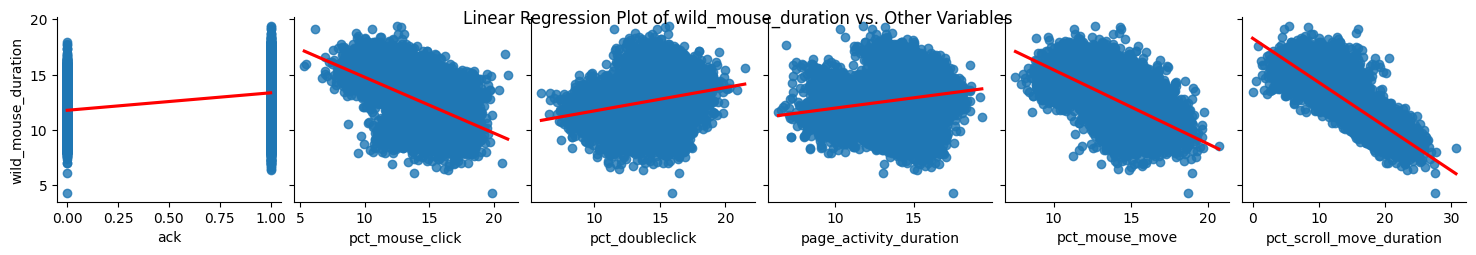

In [82]:
all_variables=['ack', 'pct_mouse_click', 'pct_doubleclick', 'page_activity_duration', 'pct_mouse_move', 'pct_scroll_move_duration', 'wild_mouse_duration']

for i in range(1, len(all_variables)):
    variable=all_variables[i]
    list_without_variable=all_variables[:i] + all_variables[i+1:]
    g = sns.pairplot(data=session, y_vars=[variable], x_vars=list_without_variable, kind="reg", plot_kws={'line_kws': {'color': 'red'}})
    g.fig.suptitle(f"Linear Regression Plot of {variable} vs. Other Variables")

    plt.show()

### Zamyslenie

V tejto fáze projektu sme sa zameriavali na analýzu a prvotné porozumenie štruktúry našich dát. Naša práca sa sústredila na tri základné datasety: product.csv, user.csv a session.csv. Pomocou týchto datasetov sme získali dôležité informácie a lepšie pochopili rozloženie jednotlivých atribútov. Pri našej analýze sme sa snažili identifikovať vzťahy a závislosti medzi rôznymi atribútmi. Napríklad, zistili sme, že dĺžka návštevy zákazníka na stránke môže ovplyvniť, či k nákupu dôjde.

V rámci datasetu session.csv sme sa bližšie pozreli na premennú "ack," ktorá nám hovorí, či zákazník uskutočnil nákup na stránke, alebo nie. Skúmali sme túto premennú v súvislosti s potenciálnymi prediktormi, ktoré sme identifikovali na základe párovej analýzy a korelácií. Týmito potenciálnymi prediktormi boli: 'pct_mouse_click', 'pct_doubleclick', 'page_activity_duration', 'pct_mouse_move', 'pct_scroll_move_duration' a 'wild_mouse_duration'. Týmto spôsobom sme sa snažili odhaliť vzťahy medzi aktivitami užívateľov na stránke a pravdepodobnosťou nákupu.

Sme presvedčení, že kombinovanie dát z týchto datasetov má veľký potenciál a v budúcnosti plánujeme tieto dáta spolu kombinovať. Napríklad, chceli by sme spojiť session.csv s product.csv na základe atribútu product_ean, keďže sa tento atribút nachádza v oboch datasetoch. Taktiež by sme radi zvážili spojenie session.csv s user.csv na základe atribútu user_id. Táto kombinácia dát nám poskytne podrobnejší pohľad na faktory ovplyvňujúce nákup na stránke. Našim cieľom je lepšie pochopiť správanie sa zákazníkov a na základe týchto poznatkov lepšie organizovať obsah a prispôsobiť preferencie užívateľov.

## Identifikácia problémov v dátach s prvotným riešením 

### Problémy v dátach

#### Product.csv

In [83]:
product.isnull().sum()

product_ean     0
location        0
store_name      0
code           15
dtype: int64

In [84]:
null_counts = product.isnull().sum()
total_records = product.shape[0]
percentage_null = (null_counts / total_records) * 100
pd.DataFrame({'Column Name': percentage_null.index, 'Percentage Null': percentage_null.values})

,Column Name,Percentage Null
0,product_ean,0.000000
1,location,0.000000
2,store_name,0.000000
3,code,0.100529


Zistili sme, že v product.csv máme počet null hodnôt v každom stĺpci takmer rovný 0%

In [85]:
duplicates = product.duplicated().sum()
duplicates

0

V našom datasete sme nenašli duplikované záznamy

In [86]:
product

,product_ean,location,store_name,code
0,2278514168815,Europe/Samara,Otradnyy,RU
1,307186409789,Europe/Paris,Colomiers,FR
2,9188379583568,Asia/Karachi,Larkana,PK
3,3552278027397,Australia/Sydney,Baulkham Hills,AU
4,3095423396295,America/New_York,Thomasville,US
...,...,...,...,...
14916,1818001213911,Europe/Zagreb,Split,HR
14917,8788878005021,Africa/Tripoli,Ghat,LY
14918,3798045203629,Europe/Rome,Campobasso,IT
14919,8442383090926,Asia/Tokyo,Motomachi,JP


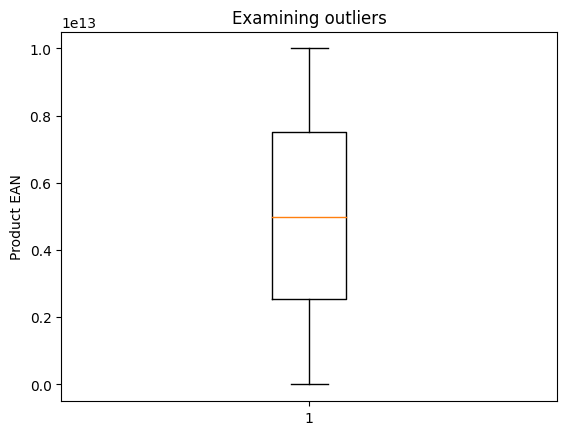

In [87]:
plt.boxplot(product['product_ean'])

# Add labels and a title
plt.ylabel('Product EAN')
plt.title('Examining outliers')

# Show the plot
plt.show()

Nenšli sme žiadnych abnormálne hodnoty

##### Záver:

Vyzerá to tak, že záznamy v product.csv sú bez väčších problémov.

#### User.csv

In [88]:
user.duplicated().sum()

0

In [89]:
user.nunique()

job                   604
birthdate            1401
name                 2525
sex                     2
address              2192
residence             903
username             2546
registration         1858
user_id              1626
mail                 2573
race                    4
email_corporation      32
dtype: int64

In [90]:
user.describe()

,user_id
count,2579.000000
mean,1284.920124
std,727.080732
min,0.000000
25%,675.000000
50%,1285.000000
75%,1918.000000
max,2578.000000


Vyzerá to tak, že máme problém s "user_id". Z funkcie .describe() vidíme, že id začínajú na nule a ich počet je 2579, čiže by to mali byť čísla od 0 do 2578. Avšak jedinečných id máme len 1626.

In [91]:
null_counts = user.isnull().sum()
total_records = user.shape[0]
percentage_null = (null_counts / total_records) * 100
pd.DataFrame({'Column Name': percentage_null.index, 'Percentage Null': percentage_null.values})

,Column Name,Percentage Null
0,job,59.984490
1,birthdate,45.017449
2,name,0.000000
3,sex,50.019387
4,address,15.005816
5,residence,64.986429
6,username,0.000000
7,registration,0.000000
8,user_id,0.000000
9,mail,0.000000


Ďaľsím problémom je vysoké percento prázdnych/nevyplnených polí. 
Ide o stĺpce:
- birthdate
- sex
- address
- residence
- registration
- race

Je potrebné sa rozhodnúť, či tieto atribúty vynecháme, alebo prázdne hotnoty nahradíme inými.

In [92]:
user

,job,birthdate,name,sex,address,residence,username,registration,user_id,mail,race,email_corporation
0,"Nurse, children's",1965-08-08,Ludmila Šimková,F,Bořetínská 20\n481 76 Polná,Konžská 16\n405 90 Borohrádek,vladimirablahova,2020-09-18,782,hajekadam@chello.cz,NaN,chello.cz
1,NaN,NaT,Fabrizia Beccaria,NaN,"Stretto Zarlino, 87\n10039, Pecco (TO)",NaN,paloma33,2021-05-14,2158,silvioiacobucci@libero.it,NaN,libero.it
2,NaN,NaT,João Alves,NaN,"Passarela de Jesus, 33\nPirineus\n19889610 Cav...",NaN,eduardoda-rosa,2017-06-23,747,beniciocampos@yahoo.com.br,NaN,yahoo.com.br
3,"Exhibitions officer, museum/gallery",2003-02-24,Zdeňka Krejčová,F,Novákovo Náměstí 2\n582 33 Protivín,NaN,jandovanela,2019-05-16,2204,jelinkovapetra@email.cz,NaN,email.cz
4,NaN,NaT,Juan Cunha,NaN,"Área Melo, 55\nDom Cabral\n03392-450 Ferreira ...",NaN,lara09,2019-10-28,720,stella46@bol.com.br,NaN,bol.com.br
...,...,...,...,...,...,...,...,...,...,...,...,...
2574,NaN,NaT,Hans-Jochen Hande,M,NaN,NaN,ruppertsilva,2015-02-07,938,kasimirgrein-groth@yahoo.de,NaN,yahoo.de
2575,NaN,NaT,Mariana Berengario,NaN,"Vicolo Amato, 990 Appartamento 6\n20872, Porto...","Via Bianca, 1\n16154, Genova (GE)",amontessori,2020-06-20,779,cabriniannamaria@yahoo.com,NaN,yahoo.com
2576,NaN,1908-08-20,Univ.Prof. Margret Trubin,NaN,NaN,NaN,mangoldrabea,2018-02-21,729,hans-ottoritter@gmx.de,NaN,gmx.de
2577,Chirurgiemechaniker,1975-08-12,Andrew Segebahn,NaN,Samuel-Hartmann-Gasse 7/2\n10165 Moers,NaN,bjopich,2019-02-21,549,pgerlach@hotmail.de,NaN,hotmail.de


Problémy sú aj v nasledujúcich stĺpcoch:
- registation : rôzne formáty dátumov a časov
- name : niektorý užívatelia si pred meno uviedli aj tituly

In [93]:
user['race'].unique()

array([nan, 'black', 'asian', 'white', 'indian'], dtype=object)

In [94]:
user['sex'].unique()

array(['F', nan, 'M'], dtype=object)

##### Záver

V súbore user.csv sme identifikovali viacero problémov:
- stĺpce bez hodnôt: birthdate, sex, address, residence, race
- problém s duplikátnym user_id
- rôzne formátovanie v stĺpci registration
- mená uvedené s titulom v stĺpci name
- niektorý používatelia sú registrovaný viackrát, pretože emailovú adresu nemá každý riadok unikátnu

#### Session.csv

In [95]:
session.duplicated().sum()

131

Máme 131 duplikovaných záznamov. 
Vymažeme ich.

Vieme, že stĺpce screen_width, browser_name, session_start, screen_height sú typu object. Pozrime sa na ne bližšie, aby sme zistili, či majú jednotný formát

In [96]:
session[['screen_width', 'browser_name', 'session_start', 'screen_height']]

,screen_width,browser_name,session_start,screen_height
0,1024,firefox,2021-08-04 05:25:09,lower
1,lower,safari,2018-10-26 23:05:20,lower
2,800,edge,2021-07-02 04:39:00,768
3,800,edge,2021-02-02 05:49:16,1080
4,1920,safari,2020-05-16 06:22:17,768
...,...,...,...,...
11047,1024,safari,2018-10-08 04:12:15,1080
11048,1920,edge,2020-10-27 15:12:22,800
11049,1024,edge,2019-05-26 16:25:10,1080
11050,1920,firefox,2018-11-28 09:19:35,1024


Vidíme, že problém máme v stĺpcoch scree_width a screen_height, kde sa nachádzajú hodnoty typu string aj iteger.

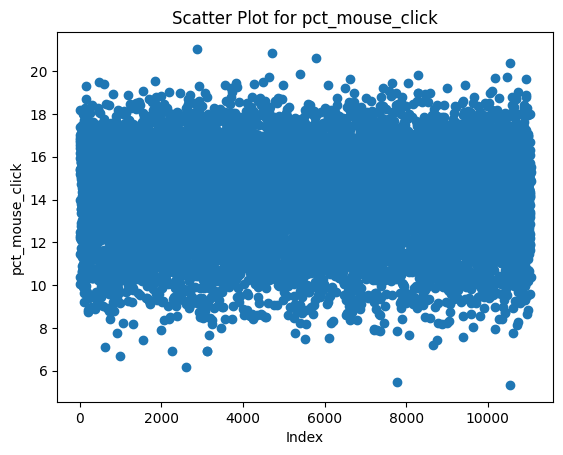

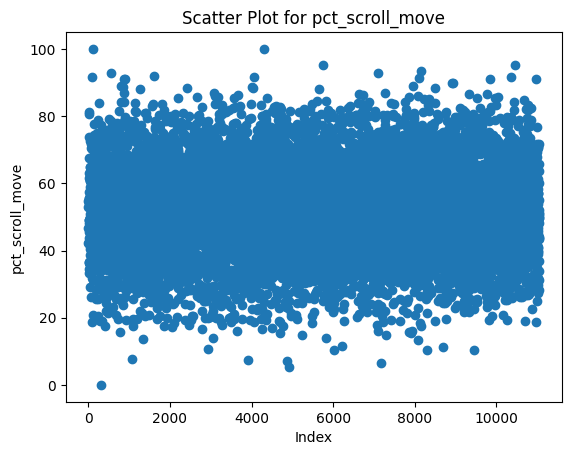

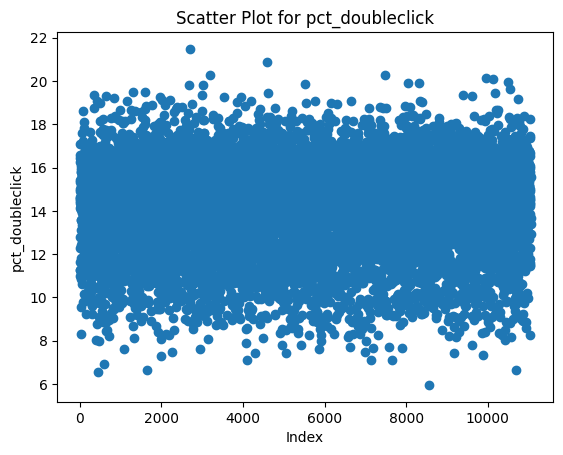

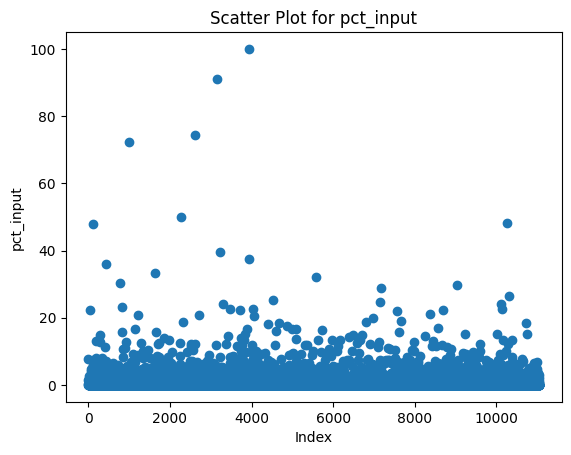

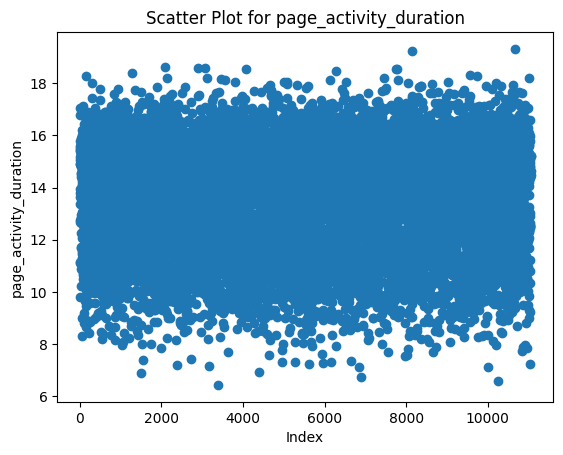

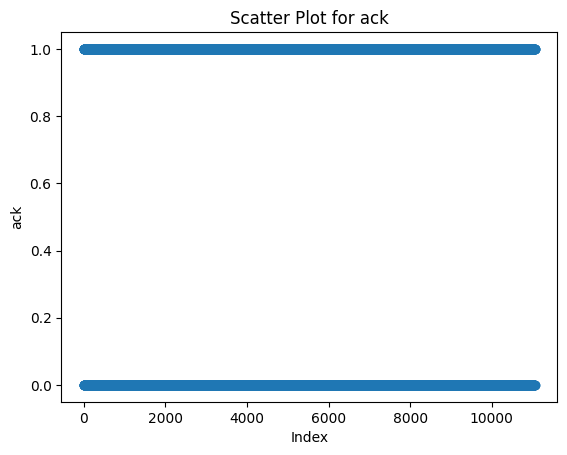

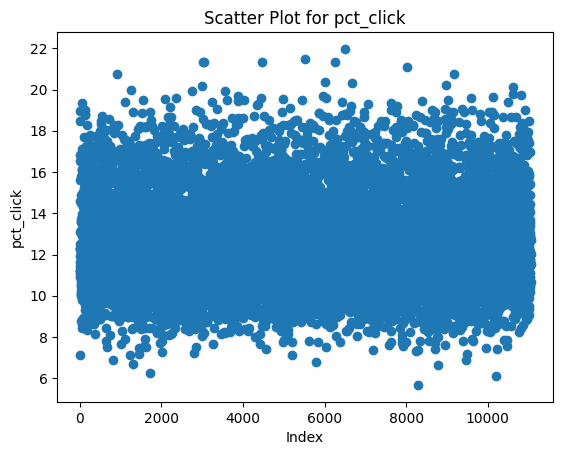

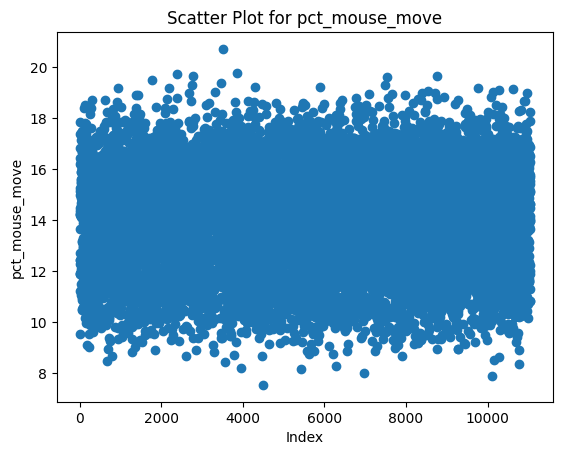

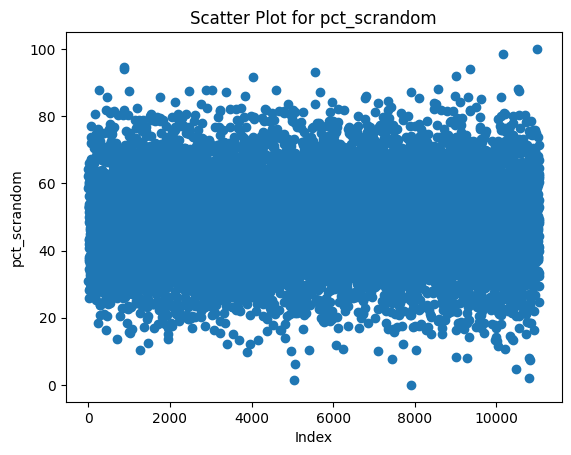

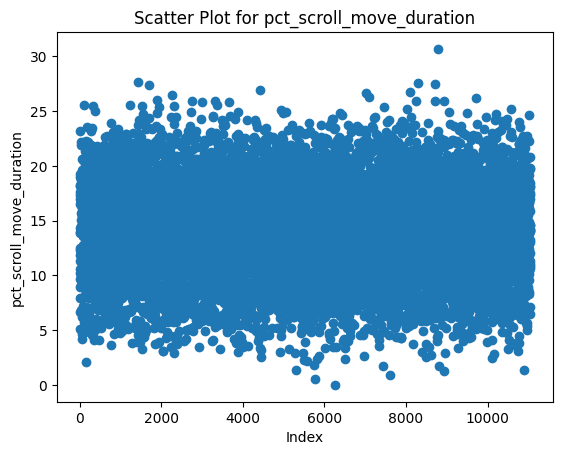

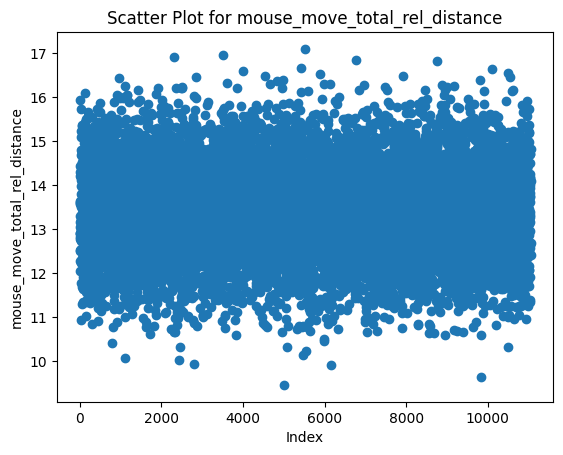

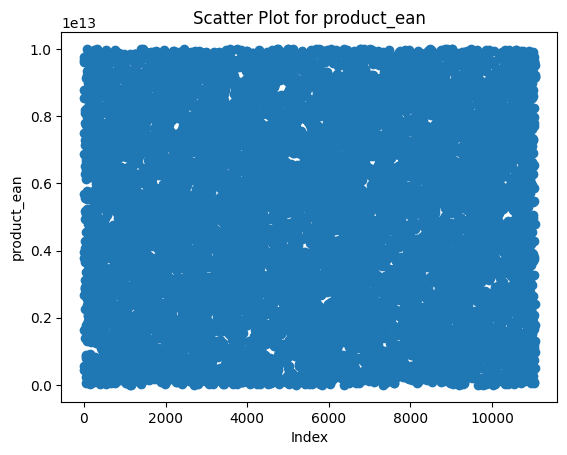

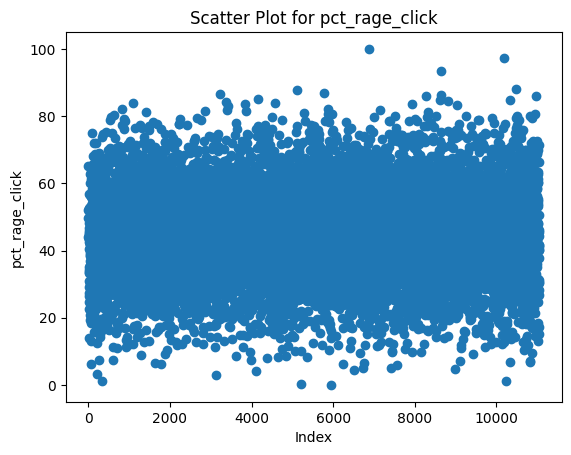

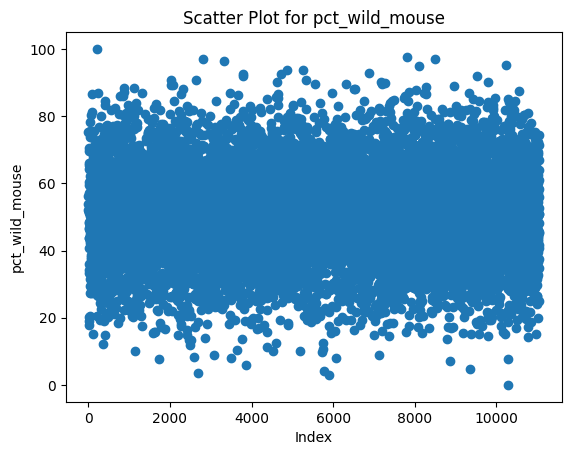

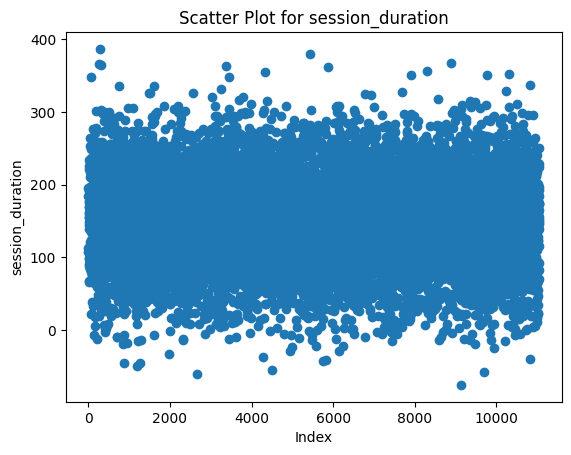

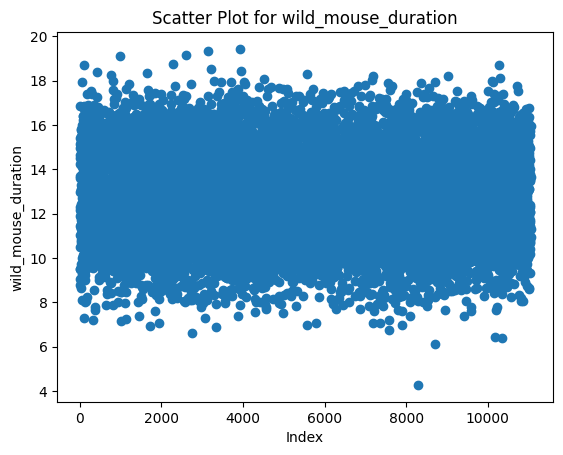

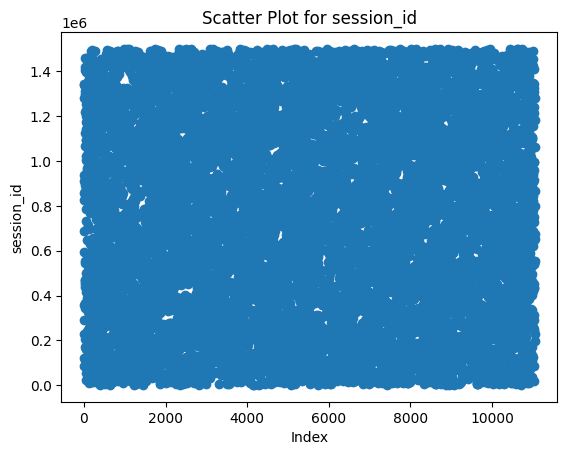

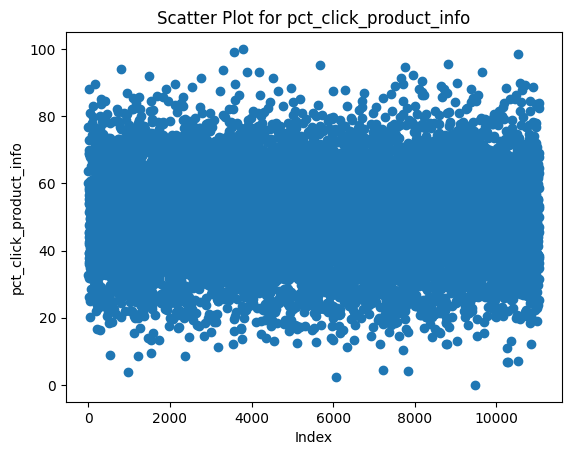

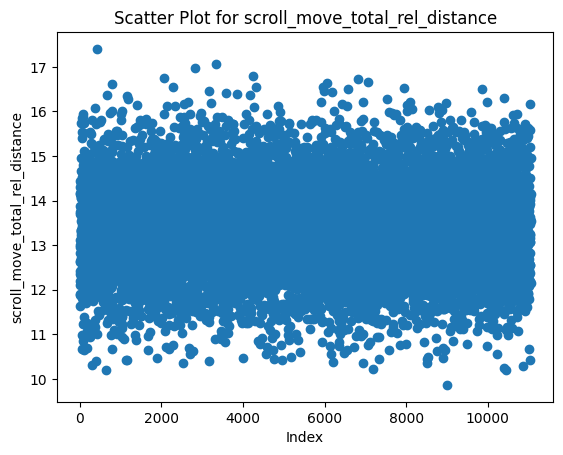

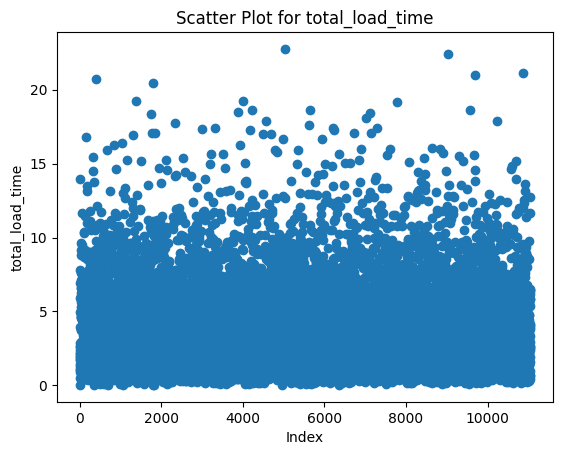

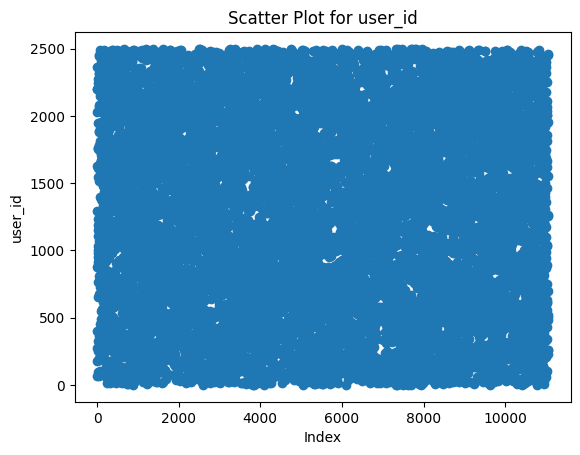

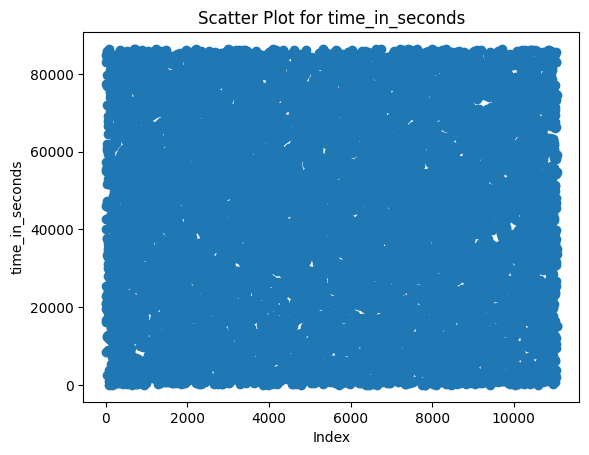

In [97]:
numbers_session = session.drop(columns = ['screen_width', 'session_start', 'screen_height', 'browser_name'], inplace=False)

for column in numbers_session.columns:
    plt.figure()
    plt.scatter(numbers_session.index, numbers_session[column])
    plt.title(f'Scatter Plot for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

Z vizualizácie vidíme, že dáta sú rovnomerne distrubuované, bez veľkých odchýliek.

In [98]:
null_counts = session.isnull().sum()
total_records = session.shape[0]
percentage_null = (null_counts / total_records) * 100
pd.DataFrame({'Column Name': percentage_null.index, 'Percentage Null': percentage_null.values})

,Column Name,Percentage Null
0,pct_mouse_click,0.108578
1,pct_scroll_move,0.099529
2,pct_doubleclick,0.099529
3,pct_input,0.099529
4,screen_width,0.000000
5,session_start,0.000000
6,page_activity_duration,0.099529
7,ack,0.000000
8,pct_click,0.099529
9,pct_mouse_move,0.099529


Vidíme, že datasete session.csv nemáme takmer žiadne nulové hodnoty.

##### Záver 

Problém v dátach nastáva v stĺpcoch scree_width a screen_height, kde sa nám mieša text s číslami. Okrem toho sa všetky ostatné dáta javia byť v poriadku.

# Riešenie problémov v dátach

### user.csv


Problém s nevyplnenými údajmi sme vyriešili ich odstránením. Konkrétne sme odstránili birthday, sex, address, residence, race. Tieto atribúty sme vynechali, kvôli predchádzajúcim analýzam, kde sme zistili, že tieto atribúty sú pre nás nezaujímavé.

In [99]:
user.drop(columns=['birthdate', 'sex', "address", "residence", "race"], inplace=True)

user


,job,name,username,registration,user_id,mail,email_corporation
0,"Nurse, children's",Ludmila Šimková,vladimirablahova,2020-09-18,782,hajekadam@chello.cz,chello.cz
1,NaN,Fabrizia Beccaria,paloma33,2021-05-14,2158,silvioiacobucci@libero.it,libero.it
2,NaN,João Alves,eduardoda-rosa,2017-06-23,747,beniciocampos@yahoo.com.br,yahoo.com.br
3,"Exhibitions officer, museum/gallery",Zdeňka Krejčová,jandovanela,2019-05-16,2204,jelinkovapetra@email.cz,email.cz
4,NaN,Juan Cunha,lara09,2019-10-28,720,stella46@bol.com.br,bol.com.br
...,...,...,...,...,...,...,...
2574,NaN,Hans-Jochen Hande,ruppertsilva,2015-02-07,938,kasimirgrein-groth@yahoo.de,yahoo.de
2575,NaN,Mariana Berengario,amontessori,2020-06-20,779,cabriniannamaria@yahoo.com,yahoo.com
2576,NaN,Univ.Prof. Margret Trubin,mangoldrabea,2018-02-21,729,hans-ottoritter@gmx.de,gmx.de
2577,Chirurgiemechaniker,Andrew Segebahn,bjopich,2019-02-21,549,pgerlach@hotmail.de,hotmail.de


V stĺpci registration, bolo rôzne formátovanie dátumov a časov. Vyriešili sme to tak, že sme všetky dátumy a časy previedli na jednotný formát.

In [100]:
user['registration'] = pd.to_datetime(user['registration'], errors='coerce')
average=user['registration'].mean()
user['registration'].fillna(average, inplace=True)
user['registration'] = user['registration'].dt.date
user['registration']

0       2020-09-18
1       2021-05-14
2       2017-06-23
3       2019-05-16
4       2019-10-28
           ...    
2574    2015-02-07
2575    2020-06-20
2576    2018-02-21
2577    2019-02-21
2578    2017-06-09
Name: registration, Length: 2579, dtype: object

Niektoré mená mali v sebe aj tituly, tie sme sa rozhodli odstrániť.

In [101]:
def clean_name(name):
    if '.' in name:
        name_parts = name.split()
        name_parts = [part for part in name_parts if '.' not in part]
        return ' '.join(name_parts)
    else:
        return name

user['name'] = user['name'].apply(clean_name)

user["name"]

0          Ludmila Šimková
1        Fabrizia Beccaria
2               João Alves
3          Zdeňka Krejčová
4               Juan Cunha
               ...        
2574     Hans-Jochen Hande
2575    Mariana Berengario
2576        Margret Trubin
2577       Andrew Segebahn
2578       Gino Cociarelli
Name: name, Length: 2579, dtype: object

Duplikátne emailové adresy sme odstránili. Následne sme však zistili, že niektorí užívatelia majú rovnaké user_id. Týmto užívateľom sme ho zmenili na unikátne. Ich staré id sme si uložili do stĺpca old_user_id, pre prípadné mergovanie dát so session.csv.

In [102]:
#delete duplicated email rows
print("Duplicated email count: ",user["mail"].duplicated().sum())
user.drop_duplicates(subset='mail', keep='first', inplace=True)
print("Duplicated email count after fix: ",user["mail"].duplicated().sum())

print("Duplicated user_id count: ",user["user_id"].duplicated().sum())

# Create a new column called 'old_user_id' to store the original user_id
user["old_user_id"] = user['user_id'].copy()

# create a list to store unique user_id
unique_id = []

for index, row in user.iterrows():
    user_id = row['user_id']
    
    # Check if user_id is unique
    if user_id not in unique_id:
        unique_id.append(user_id)
    else:
        # Assign a new unique user_id
        new_user_id = max(unique_id) + 1
        unique_id.append(new_user_id)
        user.at[index, 'user_id'] = new_user_id

print("Duplicated user_id count after fix:",user["user_id"].duplicated().sum())

Duplicated email count:  6
Duplicated email count after fix:  0
Duplicated user_id count:  948
Duplicated user_id count after fix: 0


### session.csv

Screen_width a screen_height sme previedli na jednotný formát, ktorým je integer, pretože sme zistili, že sa v týchto stĺpcoch nachádzajú hodnoty typu string aj integer. Hodnoty s "higher" alebo "lower" sme nahradili príslušným rozlíšením.

In [103]:
valid_lower = [[640, 360], [640, 480], [800, 600], [1024, 768], [1280, 720], [1360, 768], [1366, 768], [1920, 1080]]
valid_higher = [[2560, 600], [2048, 1152], [2048, 1152], [2560, 1080], [2560, 1440], [2560, 1600], [3440, 1440], [3840, 2160]]

# Create new columns with int64 data type
session['new_screen_width'] = 0
session['new_screen_height'] = 0

for i in range(len(session)):
    if session["screen_height"].iloc[i] == "lower" and session["screen_width"].iloc[i] == "lower":
        session.at[i, "new_screen_height"] = 640
        session.at[i, "new_screen_width"] = 360
    elif session["screen_height"].iloc[i] == "higher" and session["screen_width"].iloc[i] == "higher":
        session.at[i, "new_screen_height"] = 2048
        session.at[i, "new_screen_width"] = 1152
    elif session["screen_height"].iloc[i] == "lower":
        for item in valid_lower:
            if session["screen_width"].iloc[i] == str(item[0]):
                session.at[i, "new_screen_height"] = item[1]
                session.at[i, "new_screen_width"] = item[0]
    elif session["screen_width"].iloc[i] == "lower":
        for item in valid_lower:
            if session["screen_height"].iloc[i] == str(item[1]):
                session.at[i, "new_screen_width"] = item[0]
                session.at[i, "new_screen_height"] = item[1]
    elif session["screen_height"].iloc[i] == "higher":
        for item in valid_higher:
            if session["screen_width"].iloc[i] == str(item[0]):
                session.at[i, "new_screen_height"] = item[1]
                session.at[i, "new_screen_width"] = item[0]
    elif session["screen_width"].iloc[i] == "higher":
        for item in valid_higher:
            if session["screen_height"].iloc[i] == str(item[1]):
                session.at[i, "new_screen_width"] = item[0]
                session.at[i, "new_screen_height"] = item[1]
    else:
        session.at[i, "new_screen_width"] = int(session["screen_width"].iloc[i])
        session.at[i, "new_screen_height"] = int(session["screen_height"].iloc[i])


session.drop(columns=['screen_width', 'screen_height'], inplace=True)

session.rename(columns={'new_screen_width': 'screen_width', 'new_screen_height': 'screen_height'}, inplace=True)


print("screen_height data type:",session["screen_height"].dtypes)
print("screen_widthdata type:",session["screen_width"].dtypes)


screen_height data type: int64
screen_widthdata type: int64


Duplikátne riadky sme vymazali. Avšak mali sme tu ešte duplikátne session_id a tým sme priradili nové jedinečné id.

In [104]:
print("Duplicated rows:",session.duplicated().sum())
session.drop_duplicates( keep='first', inplace=True)

print("Duplicated rows after fix:",session.duplicated().sum())
print("Duplicated session_id count: ",session["session_id"].duplicated().sum())

unique_id = []

for index, row in session.iterrows():
    session_id = row['session_id']
    
    # Check if session_id is unique
    if session_id not in unique_id:
        unique_id.append(session_id)
    else:
        # Assign a new unique user_id
        new_session_id = max(unique_id) + 1
        unique_id.append(new_session_id)
        session.at[index, 'session_id'] = new_session_id

print("Duplicated session_id count after fix:",session["session_id"].duplicated().sum())


Duplicated rows: 131
Duplicated rows after fix: 0
Duplicated session_id count:  42
Duplicated session_id count after fix: 0


#  Štatistické ovorenie hypotéz v dátach

 # Hypotéza 1
*$H_0$ (nulová hypotéza)*: Dĺžka aktivity zákazníka na stránke *nemá vplyv* na to, či k nákupu dôjde.

*$H_1 = H_A$ (alternatívna hypotéza)*: Dĺžka aktivity zákazníka na stránke *má vplyv* na to, či k nákupu dôjde.


## Overenie predpokladov

### Predpoklad normálnosti rozdelenia

In [105]:
mean_duration = session['page_activity_duration'].mean()
session['page_activity_duration'].fillna(mean_duration, inplace=True)

<AxesSubplot:xlabel='ack', ylabel='page_activity_duration'>

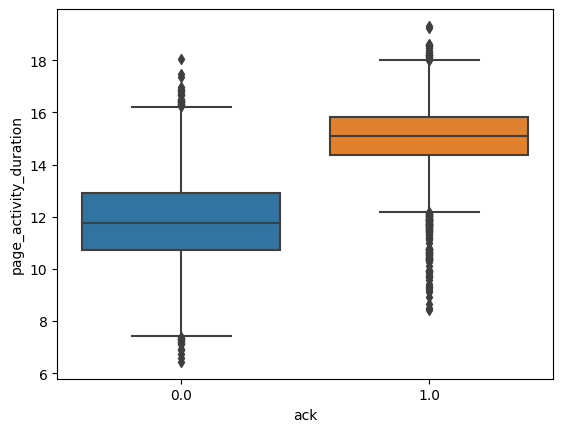

In [106]:
sns.boxplot(x='ack', y='page_activity_duration', data=session[(session.ack == 0) | (session.ack == 1)])

In [107]:
duration1 = session.loc[session.ack == 1.0, 'page_activity_duration']
duration2 = session.loc[session.ack == 0.0, 'page_activity_duration']

c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='page_activity_duration', ylabel='Density'>

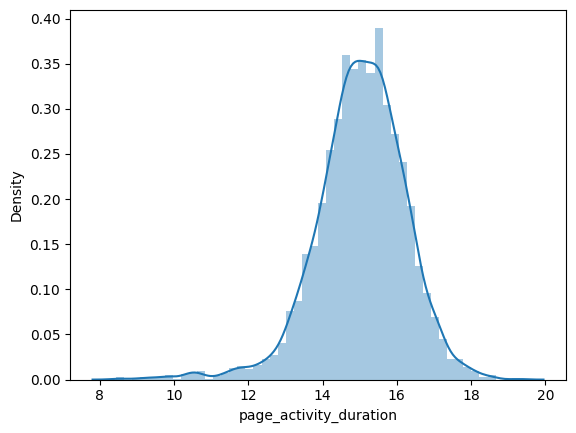

In [108]:
sns.distplot(duration1)

c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='page_activity_duration', ylabel='Density'>

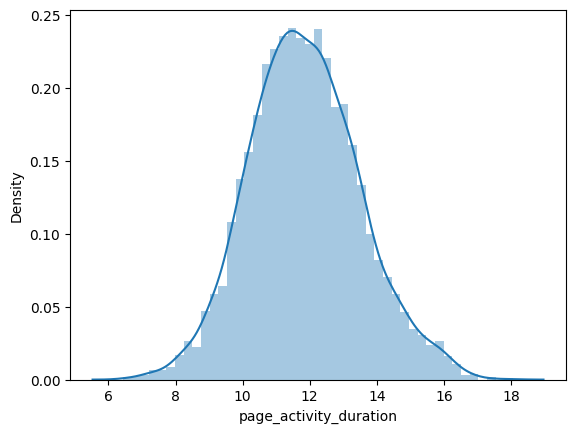

In [109]:
sns.distplot(duration2)

In [110]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [111]:
duration1_out = identify_outliers(duration1)
duration2_out = identify_outliers(duration2)

In [112]:
duration1 = duration1.drop(duration1_out.index)
duration2 = duration2.drop(duration2_out.index)

## Normálnosť rozdelenia

c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='page_activity_duration', ylabel='Density'>

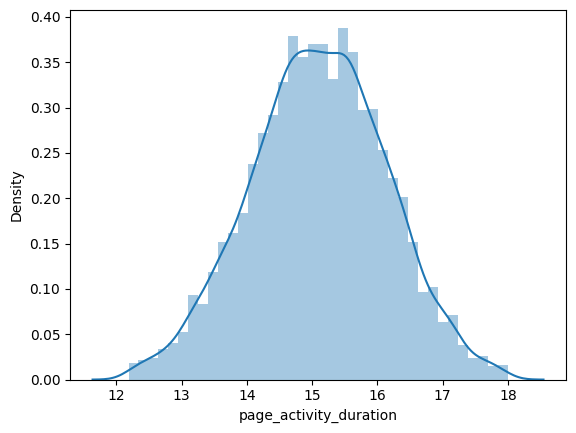

In [113]:
sns.distplot(duration1)

c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='page_activity_duration', ylabel='Density'>

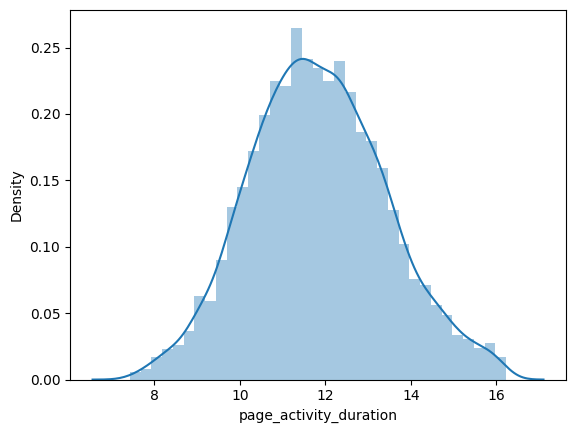

In [114]:
sns.distplot(duration2)

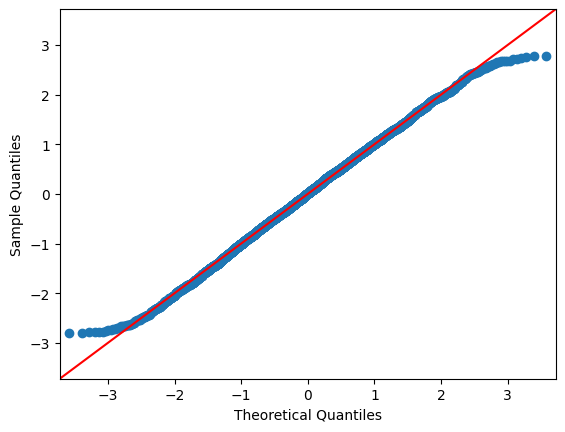

In [115]:
_ = sm.ProbPlot(duration1, fit=True).qqplot(line='45')

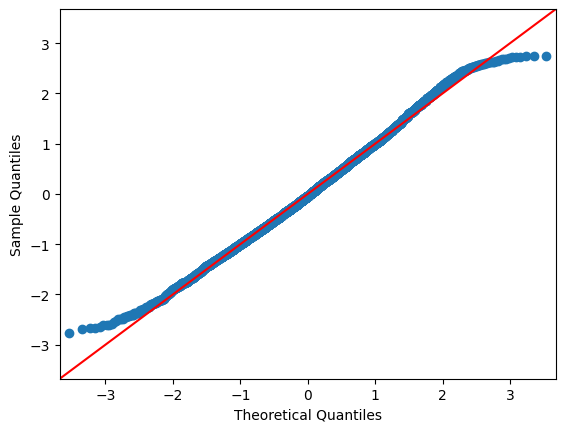

In [116]:
_ = sm.ProbPlot(duration2, fit=True).qqplot(line='45')

In [117]:
stats.shapiro(duration1)

c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.998494029045105, pvalue=2.4459011910948902e-05)

In [118]:
stats.shapiro(duration2)

ShapiroResult(statistic=0.9965192079544067, pvalue=2.5589705909823124e-09)

Dáta majú normálne rozdelenie

## Variancia Dát

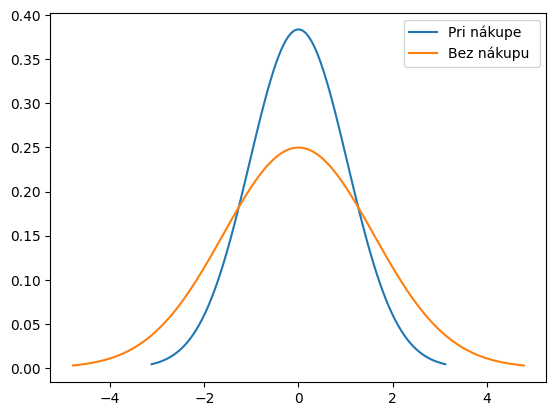

In [119]:
import math
mu = 0
variance = duration1.var()
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
variance2 = duration2.var()
sigma2 = math.sqrt(variance2)
x2 = np.linspace(mu - 3*sigma2, mu + 3*sigma2, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label="Pri nákupe ")
plt.plot(x2, stats.norm.pdf(x2, mu, sigma2),label="Bez nákupu ")

plt.legend()
plt.show()

In [120]:
stats.levene(duration1, duration2)

LeveneResult(statistic=848.6864787450425, pvalue=1.2343263621903155e-179)

Na základe výsledku testu sa zdá, že vzorky pochádzajú z rozdelení s rovnakou varianciou.

## Štatistiká sila

In [121]:
def cohen_d(x1, x2):
    nx1 = len(x1)
    nx2 = len(x2)
    s = np.sqrt(((nx1-1) * np.std(x1, ddof=1)**2 + (nx2-1) * np.std(x2, ddof=1)**2) / (nx1 + nx2 - 2))
    return (np.abs(np.mean(x1) - np.mean(x2))) / s

In [122]:
c_d = cohen_d(duration1, duration2)
c_d

2.466579702672847

In [123]:
sm_stats.power.tt_ind_solve_power(c_d, len(duration1), 0.05, None, 1)

1.0

In [124]:
sm_stats.power.tt_ind_solve_power(c_d, len(duration2), 0.05, None, 1)

1.0

Štatistická sila je dostatočne veľká.

c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

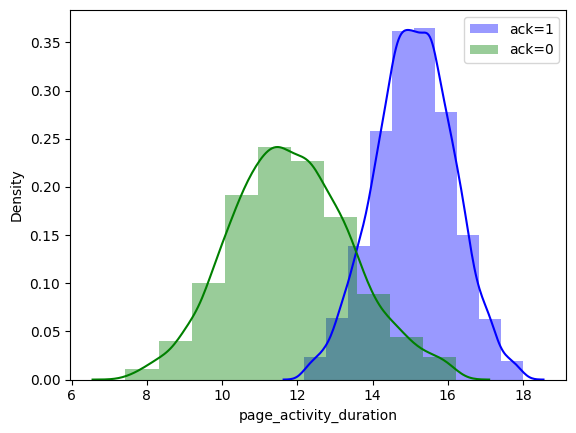

Statistics=127.285, p=0.000
Different distributions (reject H0)


In [125]:
data1 = duration1
data2 = duration2

sns.distplot(data1, bins=10, color='blue', label="ack=1")
sns.distplot(data2, bins=10, color='green', label="ack=0")

plt.legend()
plt.show()

# compare samples
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

## Záver

**Rozdiel v čase strávenom na stránke je štatisticky signifikantný**

**Dĺžka aktivity zákazníka na stránke má vplyv na to, či k nákupu dôjde. Čím dlhšie bol zákazník na stránke tým sa pravdepodobnosť úspešného nákupu zvyšovala.**

<AxesSubplot:xlabel='ack', ylabel='page_activity_duration'>

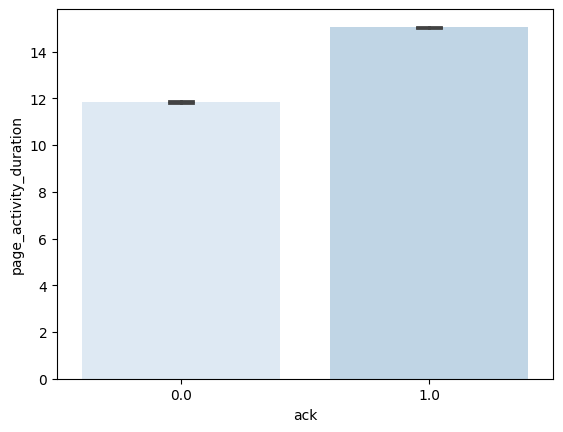

In [126]:
sns.barplot(x='ack', y='page_activity_duration', data=session[(session.ack == 1) | (session.ack == 0)], 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

 # Hypotéza 2
*$H_0$ (nulová hypotéza)*: Počet kliknutí na stránke *nemá vplyv* na to, či k nákupu dôjde.

*$H_1 = H_A$ (alternatívna hypotéza)*: Počet kliknutí zákazníka na stránke *má vplyv* na to, či k nákupu dôjde.


## Overenie predpokladov

### Predpoklad normálnosti rozdelenia

In [127]:
mean_click = session['pct_click'].mean()
session['pct_click'].fillna(mean_duration, inplace=True)

<AxesSubplot:xlabel='ack', ylabel='pct_mouse_click'>

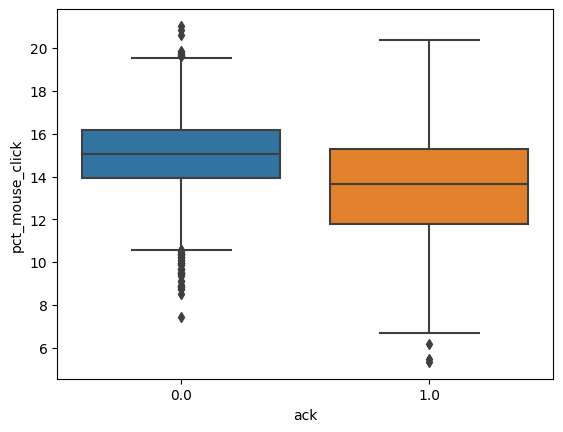

In [128]:
sns.boxplot(x='ack', y='pct_mouse_click', data=session[(session.ack == 0) | (session.ack == 1)])

In [129]:
click0 = session.loc[session.ack == 0.0, 'pct_click']
click1 = session.loc[session.ack == 1.0, 'pct_click']

c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='pct_click', ylabel='Density'>

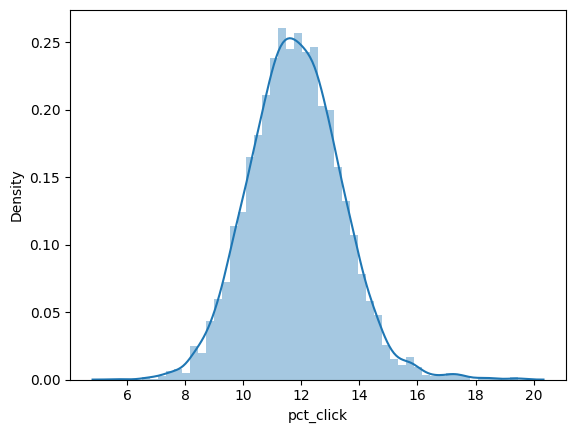

In [130]:
sns.distplot(click0)

c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='pct_click', ylabel='Density'>

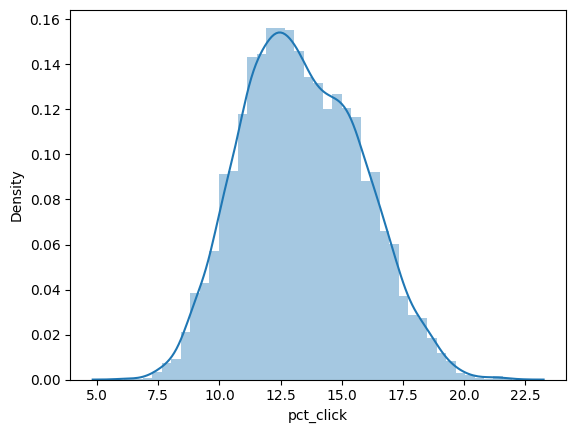

In [131]:
sns.distplot(click1)

In [132]:
click0_out = identify_outliers(click0)
click1_out = identify_outliers(click1)

In [133]:
click0=click0.drop(click0_out.index)
click1=click1.drop(click1_out.index)

## Normálnosť rozdelenia

c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='pct_click', ylabel='Density'>

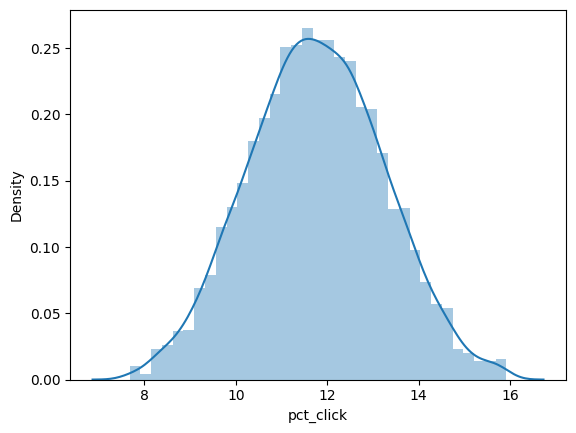

In [134]:
sns.distplot(click0)

c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='pct_click', ylabel='Density'>

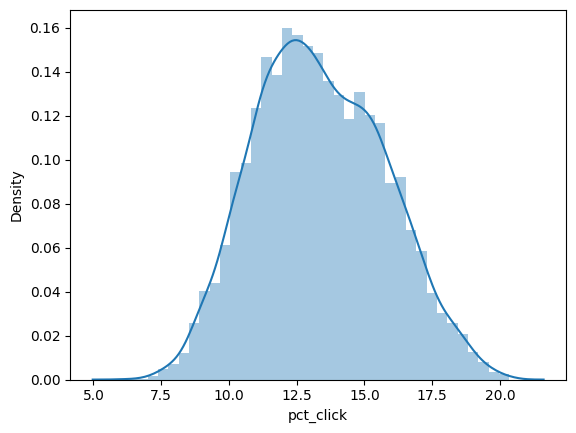

In [135]:
sns.distplot(click1)

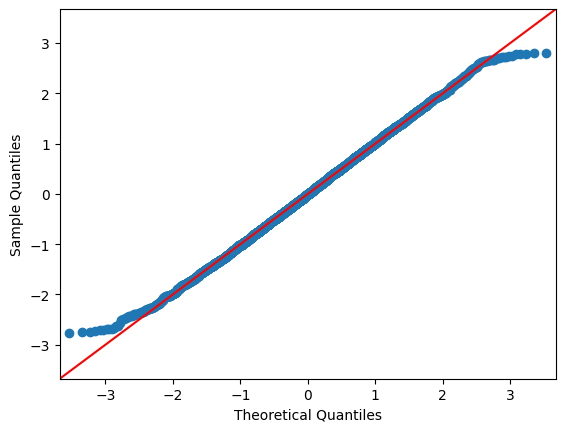

In [136]:
_ = sm.ProbPlot(click0, fit=True).qqplot(line='45')


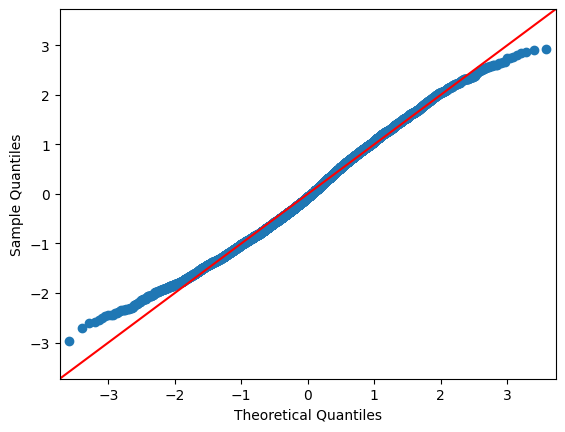

In [137]:
_ = sm.ProbPlot(click1, fit=True).qqplot(line='45')


In [138]:
print("ack=0,",stats.shapiro(click0))
print("ack=1,",stats.shapiro(click1))

ack=0, ShapiroResult(statistic=0.9984579682350159, pvalue=0.00010877547174459323)
ack=1, ShapiroResult(statistic=0.9932640790939331, pvalue=3.491438574242296e-16)


c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Variancia dát

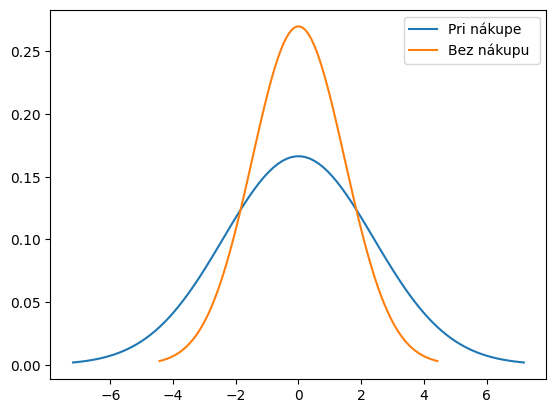

In [139]:
mu = 0
variance = click1.var()
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
variance2 = click0.var()
sigma2 = math.sqrt(variance2)
x2 = np.linspace(mu - 3*sigma2, mu + 3*sigma2, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label="Pri nákupe ")
plt.plot(x2, stats.norm.pdf(x2, mu, sigma2),label="Bez nákupu ")

plt.legend()
plt.show()

In [140]:
stats.levene(click0, click1)

LeveneResult(statistic=1183.534376613508, pvalue=2.926134471095948e-246)

Na základe výsledku testu sa zdá, že vzorky pochádzajú z rozdelení s rovnakou varianciou.



## Štatistická sila

In [141]:
c_d = cohen_d(click0, click1)
c_d

0.7821844707495191

In [142]:
sm_stats.power.tt_ind_solve_power(c_d, len(click0), 0.05, None, 1)


1.0

In [143]:
sm_stats.power.tt_ind_solve_power(c_d, len(click1), 0.05, None, 1)


1.0

Štatistická sila je dostatočne veľká.

c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
c:\Users\default.LAPTOP-E7URUV4I\Desktop\IAU\IAU-course\iau\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

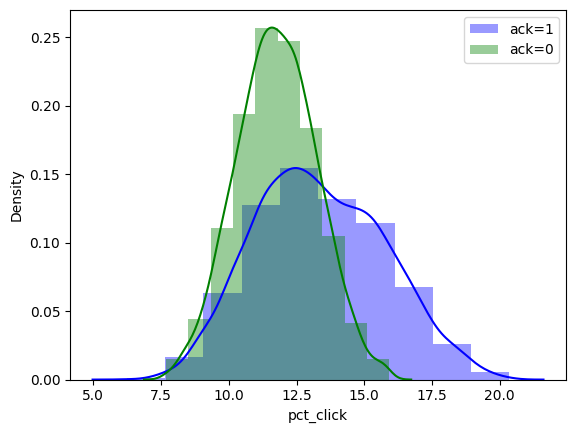

Statistics=40.535, p=0.000
Different distributions (reject H0)


In [144]:
data1 = click1
data2 = click0

sns.distplot(data1, bins=10, color='blue', label="ack=1")
sns.distplot(data2, bins=10, color='green', label="ack=0")

plt.legend()
plt.show()

# compare samples
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

## Záver

**Rozdiel v počte kliknutí na stránke je štatisticky signifikantný.**

**Počet kliknutí zákazníka na stránke má vplyv na to, či k nákupu dôjde. Čím viacej kliknutí sa uskutoční na stránke, tým je pravdepodobnosť úspešného nákupu v priemere vyššia.**

<AxesSubplot:xlabel='ack', ylabel='pct_click'>

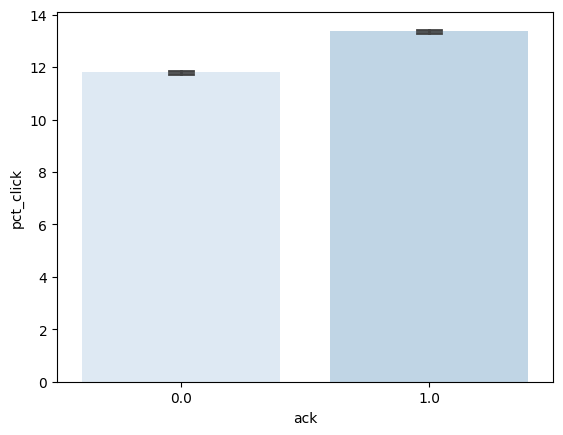

In [145]:
sns.barplot(x='ack', y='pct_click', data=session[(session.ack == 1) | (session.ack == 0)], 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))